In [ ]:
# general visualisation
library('ggplot2') # visualisation
library('scales') # visualisation
library('grid') # visualisation
library('gridExtra') # visualisation
library('RColorBrewer') # visualisation
library('corrplot') # visualisation

# general data manipulation
library('dplyr') # data manipulation
library('readr') # input/output
library('data.table') # data manipulation
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('tidyverse')

# specific visualisation
library('ggrepel') # visualisation
library('treemapify') # visualisation
library('ggforce') # visualisation
library('ggridges') # visualization

# specific data manipulation
library('broom') # data wrangling
library('purrr') # string manipulation

# Date plus forecast
library('lubridate') # date and time
library('timeDate') # date and time

In [3]:
train <- as.tibble(fread('train.csv'))
#test <- as_tibble(fread('test.csv'))
#stores <- as_tibble(fread('stores.csv'))
items <- as_tibble(fread('items.csv'))
trans <- as_tibble(fread('transactions.csv'))
#oil <- as_tibble(fread('oil.csv'))
#holidays <- as_tibble(fread('holidays_events.csv'))
sales <- read_csv("sales_adjusted.csv")

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

── Column specification ────────────────────────────────────────────────────────
cols(
  DATE = col_date(format = ""),
  MRTSSM4453USS = col_double()
)




In [ ]:
sales_adj <- read_csv("sales_adjusted.csv")

In [ ]:
sales_adj

In [3]:
sales <- sales %>% 
  rename(
    date=DATE,
    sales = MRTSSM4453USN
    )


In [22]:
sales_adj <- sales_adj %>% 
  rename(
    date=DATE,
    sales = MRTSSM4453USS
    )
sales_adj

date,sales
<date>,<dbl>
1992-01-01,1713
1992-02-01,1763
1992-03-01,1753
1992-04-01,1784
1992-05-01,1783
1992-06-01,1782
1992-07-01,1790
1992-08-01,1845
1992-09-01,1836


In [4]:
volume <- 

In [4]:
price <- read_csv("price.csv")

price <- price %>% 
  rename(
    date=DATE,
    price = PCU44534453
    )
price


── Column specification ────────────────────────────────────────────────────────
cols(
  DATE = col_date(format = ""),
  PCU44534453 = col_double()
)




date,price
<date>,<dbl>
2000-06-01,100.0
2000-07-01,99.3
2000-08-01,98.3
2000-09-01,99.4
2000-10-01,99.7
2000-11-01,100.5
2000-12-01,100.8
2001-01-01,101.3
2001-02-01,104.7


In [23]:
data <- merge(price, sales_adj, by="date")
data

date,price,sales
<date>,<dbl>,<dbl>
2000-06-01,100.0,2384
2000-07-01,99.3,2401
2000-08-01,98.3,2417
2000-09-01,99.4,2416
2000-10-01,99.7,2450
2000-11-01,100.5,2475
2000-12-01,100.8,2344
2001-01-01,101.3,2496
2001-02-01,104.7,2457


In [24]:
data$price_diff =0
data$denominator=0
data$demand_diff=0
data$numerator=0
data$elasticity=0
data

date,price,sales,price_diff,denominator,demand_diff,numerator,elasticity
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-06-01,100.0,2384,0,0,0,0,0
2000-07-01,99.3,2401,0,0,0,0,0
2000-08-01,98.3,2417,0,0,0,0,0
2000-09-01,99.4,2416,0,0,0,0,0
2000-10-01,99.7,2450,0,0,0,0,0
2000-11-01,100.5,2475,0,0,0,0,0
2000-12-01,100.8,2344,0,0,0,0,0
2001-01-01,101.3,2496,0,0,0,0,0
2001-02-01,104.7,2457,0,0,0,0,0


In [25]:
length <- nrow(data)

for(i in 1:length) {
    data["price_diff"][i,] = data["price"][i+1,] - data["price"][i,]
}

for(i in 1:length) {
    data["denominator"][i, ] = data["price_diff"][i,] / data["price"][i,]
}

for(i in 1:length) {
    data["demand_diff"][i, ] = data["sales"][i+1,] - data["sales"][i,]
}

for(i in 1:length) {
    data["numerator"][i, ] = data["demand_diff"][i, ] / data["sales"][i, ]
}

for(i in 1:length) {
    data["elasticity"][i, ] = data["numerator"][i,] / data["denominator"][i,]
}

In [25]:
data %>%
filter(date>='2014-01-01' & date <= '2014-12-31')

date,price,sales,price_diff,denominator,demand_diff,numerator,elasticity
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-01-01,122.9,3903,1.8,0.014646054,-44,-0.011273379,-0.7697213
2014-02-01,124.7,3859,-3.3,-0.026463512,16,0.004146152,-0.1566743
2014-03-01,121.4,3875,0.7,0.005766063,38,0.009806452,1.7007189
2014-04-01,122.1,3913,0.0,0.000000000,-16,-0.004088934,-Inf
2014-05-01,122.1,3897,2.2,0.018018018,113,0.028996664,1.6093149
2014-06-01,124.3,4010,0.9,0.007240547,-42,-0.010473815,-1.4465503
2014-07-01,125.2,3968,0.7,0.005591054,12,0.003024194,0.5408986
2014-08-01,125.9,3980,-1.9,-0.015091342,-18,-0.004522613,0.2996826
2014-09-01,124.0,3962,3.2,0.025806452,53,0.013377082,0.5183619


In [8]:
beer_index = which(apply(items['family'], 1, function(x) any(grepl("BEER", x))))
#beer_index
beer_nbr = items['item_nbr'][beer_index,]
beer = data.frame(beer_nbr)
beer
#sum(duplicated(beer_nbr))

item_nbr
<int>
377978
640286
661582
688279
812716
812728
812751
812757
812769


In [10]:
beer_trans = merge(x=train,y=beer, by="item_nbr")
#beer_trans

beer_sales <- beer_trans %>%
    group_by(date) %>%
    summarize(total_sales=sum(unit_sales))

beer_sales

date,total_sales
<date>,<dbl>
2013-01-01,105
2013-01-02,2411
2013-01-03,2444
2013-01-04,4796
2013-01-05,6715
2013-01-07,1865
2013-01-08,2009
2013-01-09,2256
2013-01-10,2881


In [11]:
dat <- merge(price, beer_sales, by="date")
dat


date,price,total_sales
<date>,<dbl>,<dbl>
2013-01-01,140.9,105
2013-02-01,142.6,5307
2013-03-01,141.2,5561
2013-04-01,135.5,1793
2013-05-01,137.2,5850
2013-06-01,134.9,7090
2013-07-01,134.9,2132
2013-08-01,139.5,3508
2013-10-01,139.2,2487


In [12]:
dat$price_diff =0
dat$denominator=0
dat$demand_diff=0
dat$numerator=0
dat$elasticity=0

In [13]:
length <- nrow(dat)

for(i in 1:length) {
    dat["price_diff"][i,] = dat["price"][i+1,] - dat["price"][i,]
}

for(i in 1:length) {
    dat["denominator"][i, ] = dat["price_diff"][i,] / dat["price"][i,]
}

for(i in 1:length) {
    dat["demand_diff"][i, ] = dat["total_sales"][i+1,] - dat["total_sales"][i,]
}

for(i in 1:length) {
    dat["numerator"][i, ] = dat["demand_diff"][i, ] / dat["total_sales"][i, ]
}

for(i in 1:length) {
    dat["elasticity"][i, ] = dat["numerator"][i,] / dat["denominator"][i,]
}

In [14]:
dat%>%
filter(date>='2014-01-01' & date <= '2014-12-31')

date,price,total_sales,price_diff,denominator,demand_diff,numerator,elasticity
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-01-01,122.9,349,1.8,0.014646054,11262,32.2693410,2203.27889
2014-02-01,124.7,11611,-3.3,-0.026463512,4631,0.3988459,-15.07154
2014-03-01,121.4,16242,0.7,0.005766063,-13491,-0.8306243,-144.05399
2014-04-01,122.1,2751,0.0,0.000000000,4210,1.5303526,Inf
2014-05-01,122.1,6961,3.1,0.025389025,-4226,-0.6070967,-23.91178
2014-07-01,125.2,2735,0.7,0.005591054,3871,1.4153565,253.14662
2014-08-01,125.9,6606,-1.9,-0.015091342,-4410,-0.6675749,44.23562
2014-09-01,124.0,2196,3.2,0.025806452,994,0.4526412,17.53985
2014-10-01,127.2,3190,-1.1,-0.008647799,7048,2.2094044,-255.48749


In [15]:
write.csv(dat, "beer_elasticity.csv")

`geom_smooth()` using formula 'y ~ x'



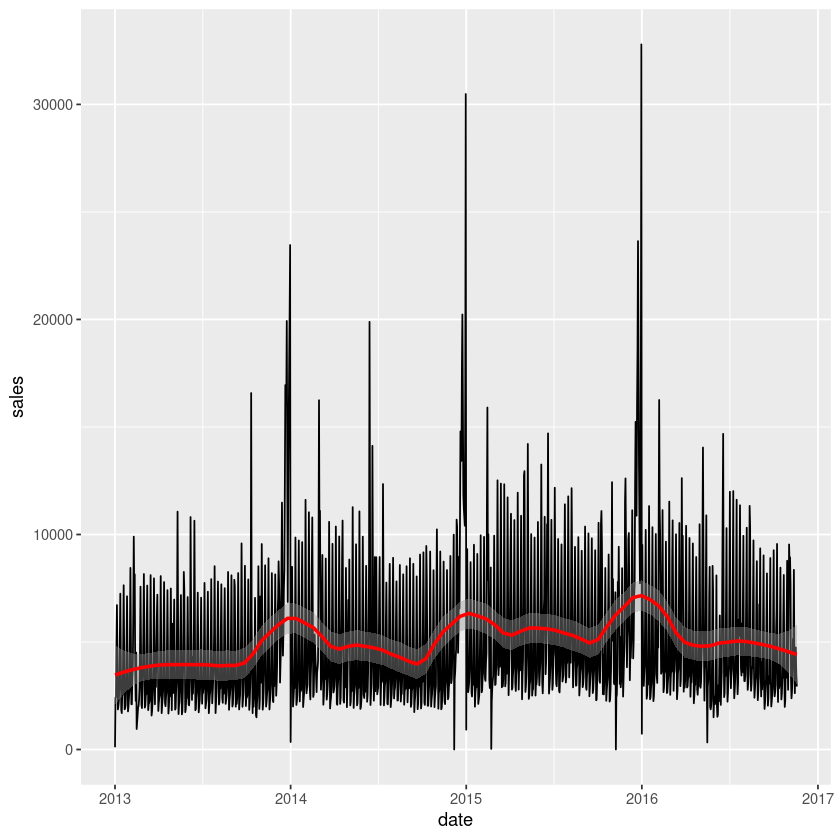

In [16]:
beer_trans %>%

  group_by(date) %>%

  summarise(sales = sum(unit_sales)) %>%

  ggplot(aes(date, sales)) +

  geom_line(color = "black") +

  geom_smooth(method = "loess", color = "red", span = 1/5)

In [ ]:
beer_trans %>%

  group_by(date) %>%

  summarise(sales = sum(unit_sales)) %>%

  filter(date >= '2014-05-01' & date <= '2014-08-01') %>%

  ggplot(aes(date, sales)) +

  geom_line(color = "black")

  #geom_smooth(method = "loess", color = "red", span = 1/5)

`geom_smooth()` using formula 'y ~ x'



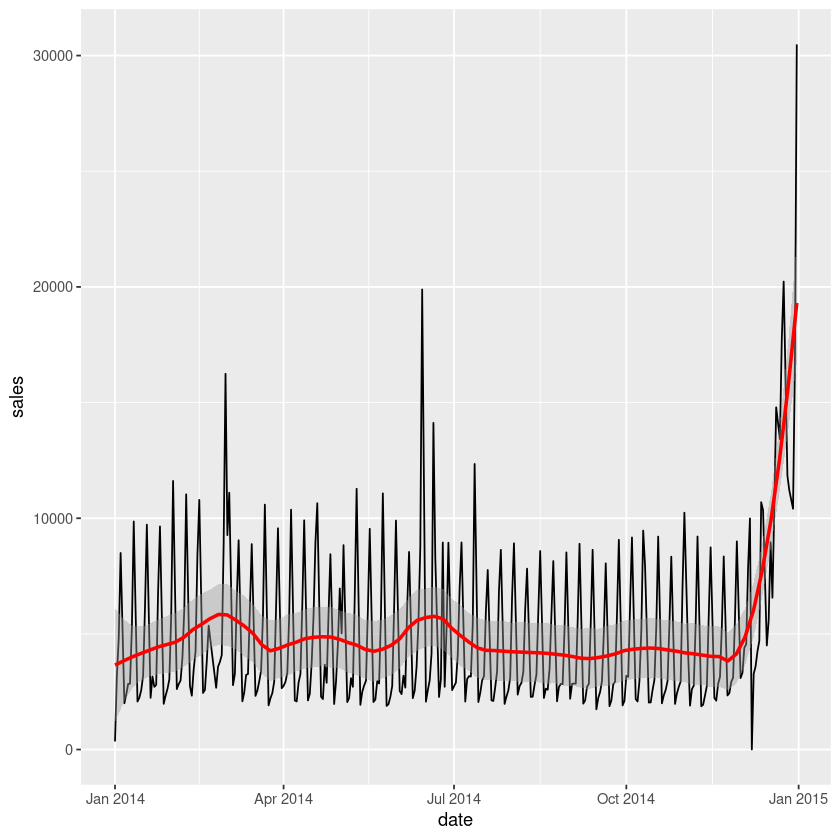

In [17]:
beer_trans %>%

  group_by(date) %>%

  summarise(sales = sum(unit_sales)) %>%

  filter(date >= '2014-01-01' & date <= '2014-12-31') %>%

  ggplot(aes(date, sales)) +

  geom_line(color = "black") +

  geom_smooth(method = "loess", color = "red", span = 1/5)

`geom_smooth()` using formula 'y ~ x'



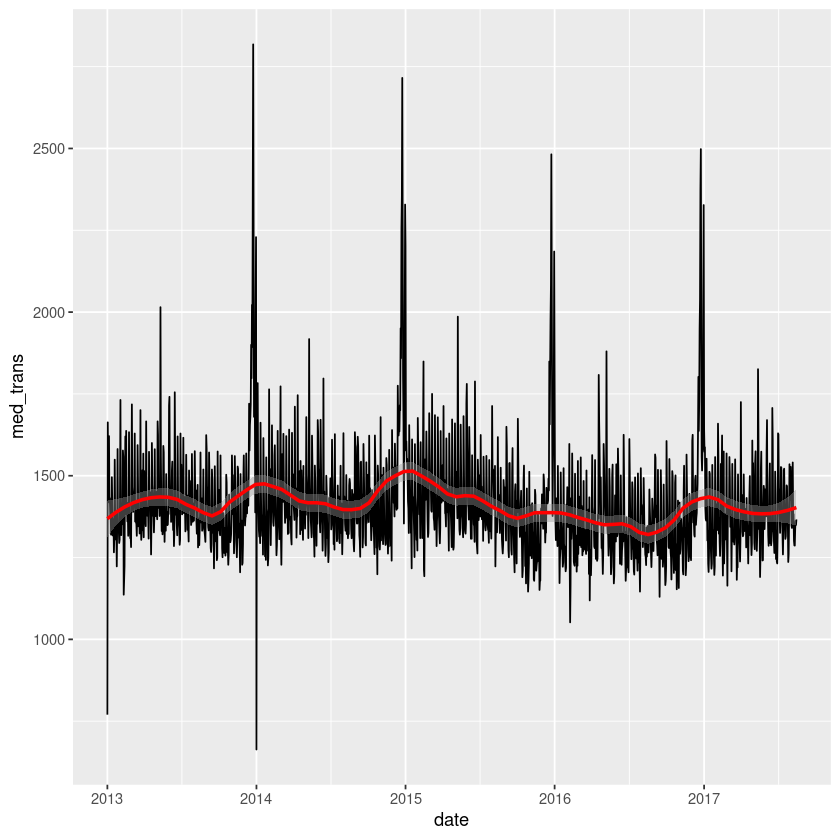

In [18]:
trans %>%

  group_by(date) %>%

  summarise(med_trans = median(transactions)) %>%

  ggplot(aes(date, med_trans)) +

  geom_line(color = "black") +

  geom_smooth(method = "loess", color = "red", span = 1/5)

`geom_smooth()` using formula 'y ~ x'



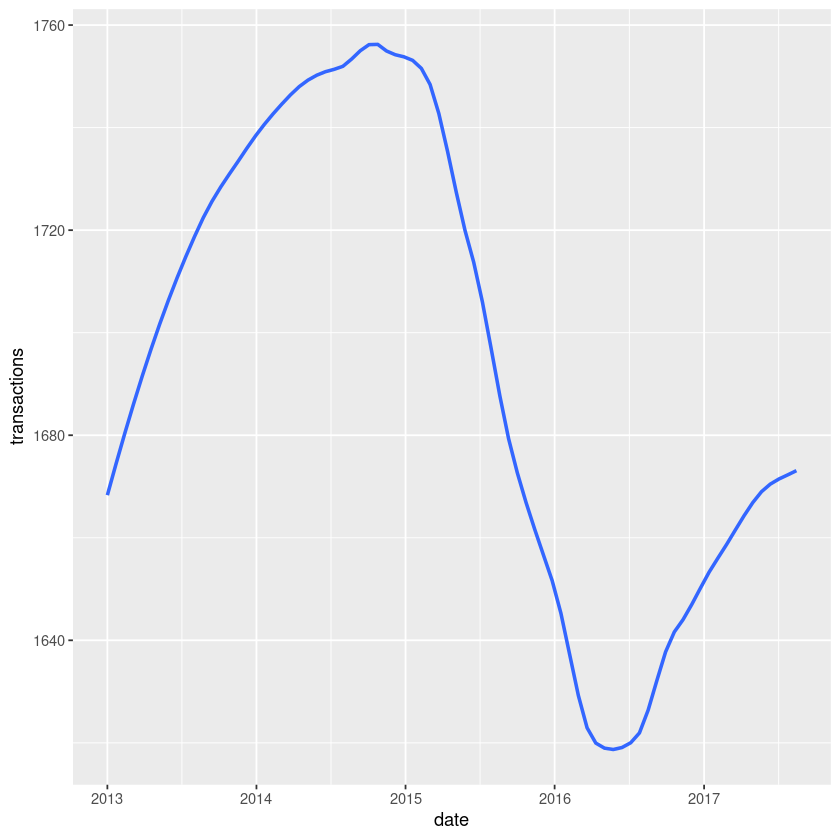

In [19]:
trans %>%

  ggplot(aes(date, transactions, color = store_nbr)) +

  geom_smooth(method = "loess", span = 1/2, se = FALSE)